In [ ]:
# Dependencies

import requests  
#The requests module allows us to send HTTP requests using Python

from bs4 import BeautifulSoup  
#This line is used to import the Beautiful Soup library into the application.

# import Pandas Library
import pandas as pd  

# import RE Library
import re 
#Regular expression operations Library the functions in this module let us check 
#if a particular string matches a given regular expression

# import matplotlib Library
import matplotlib.pyplot as plt 

#Using Splinter to automate browser actions
from splinter import Browser  

In [ ]:

import numpy as np

import seaborn as sns 


import string
import unicodedata

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

import os

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
#choosing chrom driver 
!which chromedriver

/usr/local/bin/chromedriver


In [ ]:
executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)

In [ ]:
query = 'COVID-19'.lower()  
url = f'https://www.bing.com/news/search?q={query}&form=QBNH'

In [ ]:
# visiting the Url in the our browser 
browser.visit(url)

In [ ]:
html = browser.html

In [ ]:
#Creat a Beautiful Soup object and the object returned is assigned to the soup variable.
soup = BeautifulSoup(html, 'html.parser')

type(soup)

bs4.BeautifulSoup

In [ ]:
news = soup.find_all('div', class_='t_s', limit = 50)
print(f'Number of scraped news: {len(news)}') #check out if we have 50 

Number of scraped news: 50


In [ ]:
titles = [n.find('a',class_ = 'title').text for  n  in news]   #.text :Extract the text of the tittle
abstracts = [n.find('div', class_='snippet').text for  n  in news]

In [ ]:
news_df = pd.DataFrame({'title': titles , 'abstract': abstracts })
news_df.to_csv('Top_50_COVID19_news.csv', index = False)
news_df.head()

,title,abstract
0,'My lifeline': Doctor's pilot program bridges ...,Dr. Ben Moor has launched a pilot program at B...
1,The Five Fallacies That Hamstrung Our Response...,Five key fallacies and pitfalls have affected ...
2,Covid-19 Live Updates: Single Pfizer Dose Stro...,Two new pieces of research support the case fo...
3,Johnson & Johnson: FDA advisers to consider th...,US FDA vaccine advisers are scheduled to meet ...
4,Auto-antibodies against type I IFNs are associ...,(auto-Abs) against type I interferons (IFNs) w...


In [ ]:
from nltk.corpus import stopwords 
import unidecode

stop_words = set(stopwords.words('english') + stopwords.words('spanish'))

lemmer = WordNetLemmatizer()

def preprocess(x):
    # Lower case
    x = x.lower()
    
    # Remove punctuation
    x = re.sub(r'[^\w\s]', '', x)
    
    # Remove non-unicode
    x = unidecode.unidecode(x)
    
    # Remove numbers
    x = re.sub(r'\d+', '', x)
    
    # Remove stopwords and lemmatize
    x = [lemmer.lemmatize(w) for w in x.split() if w not in stop_words]
    return ' '.join(x) 

%time news_df['abs_clean'] = news_df['abstract'].apply(preprocess)
news_df.head()

CPU times: user 1.23 s, sys: 40 ms, total: 1.27 s
Wall time: 1.28 s


,title,abstract,abs_clean
0,'My lifeline': Doctor's pilot program bridges ...,Dr. Ben Moor has launched a pilot program at B...,dr ben moor launched pilot program beth israel...
1,The Five Fallacies That Hamstrung Our Response...,Five key fallacies and pitfalls have affected ...,five key fallacy pitfall affected publichealth...
2,Covid-19 Live Updates: Single Pfizer Dose Stro...,Two new pieces of research support the case fo...,two new piece research support case giving one...
3,Johnson & Johnson: FDA advisers to consider th...,US FDA vaccine advisers are scheduled to meet ...,u fda vaccine adviser scheduled meet friday di...
4,Auto-antibodies against type I IFNs are associ...,(auto-Abs) against type I interferons (IFNs) w...,autoabs type interferon ifns distinctly found ...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000

tf_vectorizer = CountVectorizer(min_df=.05, max_df=.5, max_features=no_features, ngram_range=[1,3])
%time dtm_tf = tf_vectorizer.fit_transform(news_df['abs_clean'])
print(dtm_tf.shape)

CPU times: user 3.52 ms, sys: 845 µs, total: 4.37 ms
Wall time: 3.71 ms
(50, 47)


In [ ]:
df = pd.DataFrame(dtm_tf.toarray(), columns=tf_vectorizer.get_feature_names())
df.head()

,administration,adviser,american,biden,bidens,bidens trillion,case,coronavirus,country,covid,...,relief,rollout,said,say,shot,state,time,trillion,vaccine,vaccine rollout
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Calculate column sums from DTM
sum_words = dtm_tf.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in tf_vectorizer.vocabulary_.items()]

# Now, sort them
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

# Display top few
words_freq[:20]

[('covid', 20),
 ('vaccine', 14),
 ('new', 9),
 ('friday', 8),
 ('coronavirus', 7),
 ('said', 6),
 ('johnson', 6),
 ('case', 5),
 ('get', 5),
 ('house', 5),
 ('people', 4),
 ('fda', 4),
 ('food', 4),
 ('drug', 4),
 ('administration', 4),
 ('covid vaccine', 4),
 ('say', 4),
 ('american', 4),
 ('decline', 4),
 ('bidens', 4)]

<Figure size 720x1152 with 0 Axes>

/Users/maryamasghari/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


FrequencyVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfe1b6a7d0>,
                    color=None,
                    features=['administration', 'adviser', 'american', 'biden',
                              'bidens', 'bidens trillion', 'case',
                              'coronavirus', 'country', 'covid', 'covid case',
                              'covid vaccine', 'death', 'decline', 'drug',
                              'drug administration', 'even', 'expected', 'fda',
                              'first', 'food', 'food drug',
                              'food drug administration', 'friday', 'get',
                              'house', 'joe', 'johnson', 'johnson johnson',
                              'launched', ...],
                    n=None, orient='h')

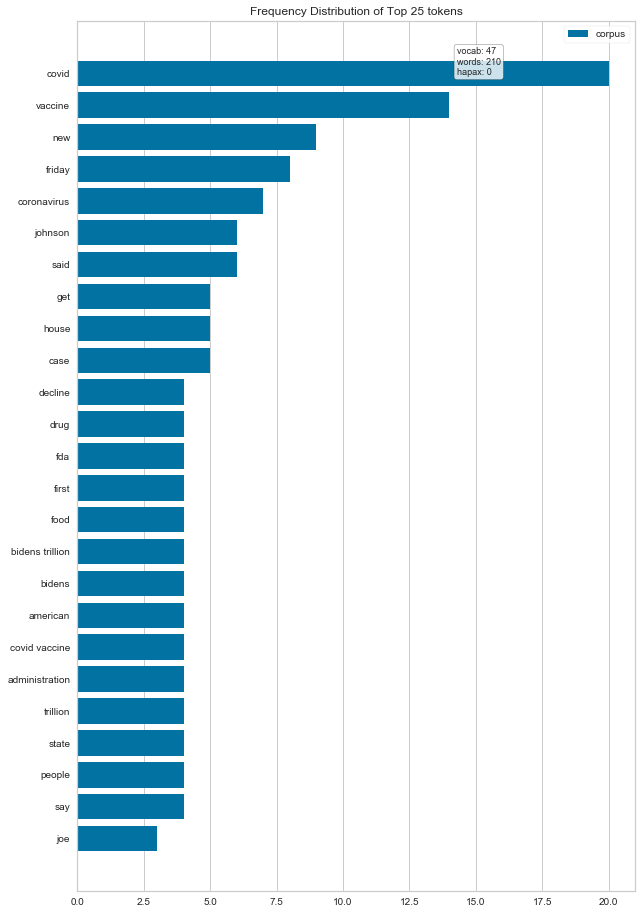

In [ ]:
from yellowbrick.text import FreqDistVisualizer

plt.figure(figsize=(10,16))
visualizer = FreqDistVisualizer(features=tf_vectorizer.get_feature_names(), n=25)
visualizer.fit(dtm_tf)
visualizer.poof()

In [ ]:
#Embeddings with Doc2Vec

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
docs =news_df['abs_clean']
docs

0     dr ben moor launched pilot program beth israel...
1     five key fallacy pitfall affected publichealth...
2     two new piece research support case giving one...
3     u fda vaccine adviser scheduled meet friday di...
4     autoabs type interferon ifns distinctly found ...
5     rich country race inoculate population covid p...
6     u crossed covid death milestone earlier week g...
7     patient hospitalized covid treated anticoagula...
8     food drug administration expected act quickly ...
9     queen said hesitant get vaccine ought think pe...
10    hospital public health official say vaccine su...
11    although pace coronavirus vaccine rollout seem...
12    israel boast world fastest covid vaccine rollo...
13    even daily toll covid death decline latino res...
14    democraticcontrolled house representative frid...
15    period decline seeing rise covid case globally...
16    allday meeting provide u food drug administrat...
17    fda committee weighs new johnson johnson v

In [ ]:
documents = [TaggedDocument(doc.split(), [i]) for i, doc in enumerate(docs)]

In [ ]:
%time model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4, epochs=10000, alpha=0.065, seed=123)
print(model)
for i in range(0, len(docs)):
    print(model.docvecs[i])

CPU times: user 27.8 s, sys: 1.94 s, total: 29.7 s
Wall time: 28.5 s
Doc2Vec(dm/m,d5,n5,w2,s0.001,t4)
[  7.620764   -27.422403    -4.262467     5.896982    -0.42712232]
[  0.35844237 -15.608034     1.5443809   -6.7271214  -22.280245  ]
[11.249979  -5.8995614 25.515736  -3.2411842 -9.68597  ]
[-5.3366804 -4.379212   5.895523  -3.652425  -1.8412174]
[  0.07484542  -5.7045264   22.107878    -7.9091334  -10.182708  ]
[ 15.566442  -13.965632    6.0491757  -8.403789   -5.4665437]
[ -5.2965226 -12.63575     2.2338467   1.2725145 -18.621668 ]
[  1.7404063  -7.2584043  12.219391  -11.480928  -13.59162  ]
[ -9.589631   -14.538251    -0.32312703  -4.0883574   -6.4551277 ]
[ 13.705309  -10.148388   18.410479   -7.60044    -0.5038349]
[ -2.4175897 -17.813145    6.144014    2.6619096  10.349515 ]
[18.314024  -9.226116  15.4887905 -3.0148745 -8.483646 ]
[ 12.910492   -8.999639    6.9936156  -3.6832952 -13.623254 ]
[ -0.20167485 -10.12065      7.454993     8.797301   -18.739277  ]
[-10.481199  -10.038

In [ ]:
model

In [ ]:
%%time

import collections

ranks = []
second_ranks = []
for doc_id in range(len(documents)):
    inferred_vector = model.infer_vector(documents[doc_id].words)
    sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)
    second_ranks.append(sims[1])

CPU times: user 17.8 s, sys: 9.69 ms, total: 17.8 s
Wall time: 17.8 s


In [ ]:
collections.Counter(ranks).most_common(10) 
collections.Counter(ranks)[0]
collections.Counter(ranks)[1]
collections.Counter(ranks)[43]

[(0, 49), (1, 1)]

49

1

0

In [ ]:
doc_id = 45
print('Document ({}): «{}»\n'.format(doc_id, ' '.join(documents[doc_id].words)))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
for label, index in [('MOST', 0), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(documents[sims[index][0]].words)))

Document (45): «six straight week decline new covid case u number started plateau even»

SIMILAR/DISSIMILAR DOCS PER MODEL Doc2Vec(dm/m,d5,n5,w2,s0.001,t4):

MOST (49, 0.9999362230300903): «canada pension plan investment board said accepted resignation chief executive mark machin day»

MEDIAN (3, 0.4612264037132263): «u fda vaccine adviser scheduled meet friday discus potential emergency authorization third coronavirus»

LEAST (48, 0.04073569178581238): «president joe biden urged american wear mask let guard number coronavirus case declined»



In [ ]:
doc_id = 5
print('Train Document ({}): «{}»\n'.format(doc_id, ' '.join(documents[doc_id].words)))
sim_id = second_ranks[doc_id]
print('Similar Document {}: «{}»\n'.format(sim_id, ' '.join(documents[sim_id[0]].words)))

Train Document (5): «rich country race inoculate population covid poorer nation fallen behind biggest»

Similar Document (30, 0.9138939380645752): «harmless side effect shot swollen lymph node mean vaccine working could cause false alarm»



In [ ]:
idx = 0
sim = model.docvecs.most_similar(idx, topn=10)
sim

idx
docs.iloc[idx]
model.docvecs[idx]

for i in range(0, 3):
    print("Closest doc {} {} ({})".format(i, sim[i][0], sim[i][1]))
    closest_idx = sim[i][0]
    docs.iloc[closest_idx]
    model.docvecs[closest_idx]

[(38, 0.9334924817085266),
 (34, 0.9213828444480896),
 (42, 0.9158637523651123),
 (43, 0.8754128217697144),
 (31, 0.8246647119522095),
 (22, 0.8065633773803711),
 (18, 0.7656664252281189),
 (26, 0.7562540173530579),
 (10, 0.7107267379760742),
 (48, 0.6665794849395752)]

0

'dr ben moor launched pilot program beth israel deaconess hospitalplymouth hope combatting isolating'

array([  7.620764  , -27.422403  ,  -4.262467  ,   5.896982  ,
        -0.42712232], dtype=float32)

Closest doc 0 38 (0.9334924817085266)


'eight employee russia embassy pyongyang family spent hour trying leave north korea'

array([ 11.296869 , -27.311533 ,  -5.1689177,  -3.5876644,  -4.482127 ],
      dtype=float32)

Closest doc 1 34 (0.9213828444480896)


'head canada biggest public pension fund abruptly resigned post shortly news broke avoided'

array([  8.550722  , -22.977898  ,  -4.1850743 ,  -4.7194934 ,
        -0.06356911], dtype=float32)

Closest doc 2 42 (0.9158637523651123)


'investigator seeking information second food market chinese city first officially confirmed'

array([ -3.6521332, -24.915716 ,  -3.2424612,   7.667409 ,   0.8926252],
      dtype=float32)

In [ ]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.test.utils import common_texts
from gensim.models import Word2Vec



In [ ]:
docs

0     dr ben moor launched pilot program beth israel...
1     five key fallacy pitfall affected publichealth...
2     two new piece research support case giving one...
3     u fda vaccine adviser scheduled meet friday di...
4     autoabs type interferon ifns distinctly found ...
5     rich country race inoculate population covid p...
6     u crossed covid death milestone earlier week g...
7     patient hospitalized covid treated anticoagula...
8     food drug administration expected act quickly ...
9     queen said hesitant get vaccine ought think pe...
10    hospital public health official say vaccine su...
11    although pace coronavirus vaccine rollout seem...
12    israel boast world fastest covid vaccine rollo...
13    even daily toll covid death decline latino res...
14    democraticcontrolled house representative frid...
15    period decline seeing rise covid case globally...
16    allday meeting provide u food drug administrat...
17    fda committee weighs new johnson johnson v

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/maryamasghari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
word_tokenize(docs[0])

['dr',
 'ben',
 'moor',
 'launched',
 'pilot',
 'program',
 'beth',
 'israel',
 'deaconess',
 'hospitalplymouth',
 'hope',
 'combatting',
 'isolating']

In [ ]:
data = [] 
#iterate through each sentence in the file 
for doc in docs: 
    temp = [] 
      
    # tokenize the sentence into words 
    for j in word_tokenize(doc): 
        temp.append(j.lower()) 
  
    data.append(temp)

In [ ]:
%time model = Word2Vec(sentences = data , size= 64 , sg=1, window=10 , min_count=1, seed= 123, )

CPU times: user 91.4 ms, sys: 4.27 ms, total: 95.7 ms
Wall time: 94.2 ms


In [ ]:
len(model.wv.vocab)

432

In [ ]:
len(model.wv['covid'])

64

In [ ]:
model.wv.most_similar('covid')

[('half', 0.3819718360900879),
 ('number', 0.3430613875389099),
 ('everything', 0.3251429796218872),
 ('executive', 0.32186612486839294),
 ('year', 0.313020795583725),
 ('advisory', 0.29444003105163574),
 ('uk', 0.28129592537879944),
 ('guard', 0.2782972455024719),
 ('way', 0.2761504352092743),
 ('fallen', 0.27530476450920105)]

In [ ]:
model.wv.most_similar('health')

[('vaccinefinder', 0.3468463122844696),
 ('pneumonia', 0.3335531949996948),
 ('reaching', 0.3172944486141205),
 ('available', 0.3133639097213745),
 ('arthritis', 0.3066685199737549),
 ('queen', 0.3010064363479614),
 ('giving', 0.29739099740982056),
 ('sector', 0.28493982553482056),
 ('united', 0.27228182554244995),
 ('america', 0.2712963819503784)]

In [ ]:
model.wv.most_similar('health')

In [ ]:
model.wv.most_similar('vaccine')

[('year', 0.40736860036849976),
 ('dose', 0.3698485791683197),
 ('reducing', 0.34107768535614014),
 ('say', 0.3329296112060547),
 ('apologized', 0.32545703649520874),
 ('put', 0.32500576972961426),
 ('rollout', 0.3136020302772522),
 ('isolating', 0.3114992380142212),
 ('supply', 0.30676132440567017),
 ('played', 0.3048655390739441)]

In [ ]:
model.wv.doesnt_match("covid health vaccine hour".split())

'hour'

In [ ]:
model.wv.similarity("covid","vaccine")

0.1406512

In [ ]:
model.wv.similarity("covid","patient")

-0.08239451

In [ ]:
%time secondmodel = Word2Vec(sentences = data , size= 10 , sg=1, window=25 , min_count=2, seed= 123, )

CPU times: user 22 ms, sys: 2.33 ms, total: 24.3 ms
Wall time: 22.5 ms


In [ ]:
len(secondmodel.wv.vocab)

85

In [ ]:
secondmodel.wv.vocab

{'dr': <gensim.models.keyedvectors.Vocab at 0x7fcfc6849850>,
 'launched': <gensim.models.keyedvectors.Vocab at 0x7fcfc68493d0>,
 'israel': <gensim.models.keyedvectors.Vocab at 0x7fcfc6849150>,
 'five': <gensim.models.keyedvectors.Vocab at 0x7fcfc6849bd0>,
 'new': <gensim.models.keyedvectors.Vocab at 0x7fcfc6849d10>,
 'case': <gensim.models.keyedvectors.Vocab at 0x7fcfc6849c50>,
 'one': <gensim.models.keyedvectors.Vocab at 0x7fcfc68496d0>,
 'dose': <gensim.models.keyedvectors.Vocab at 0x7fcfc6849a10>,
 'vaccine': <gensim.models.keyedvectors.Vocab at 0x7fcfc6849f50>,
 'people': <gensim.models.keyedvectors.Vocab at 0x7fcfc6849ad0>,
 'u': <gensim.models.keyedvectors.Vocab at 0x7fcfc6849fd0>,
 'fda': <gensim.models.keyedvectors.Vocab at 0x7fcfc6849b10>,
 'adviser': <gensim.models.keyedvectors.Vocab at 0x7fcfc6849e90>,
 'friday': <gensim.models.keyedvectors.Vocab at 0x7fcfc6849990>,
 'authorization': <gensim.models.keyedvectors.Vocab at 0x7fcfc6849890>,
 'coronavirus': <gensim.models.keyedve

In [ ]:
len(secondmodel.wv['covid'])

10

In [ ]:
secondmodel.wv['covid']

array([ 0.03435746, -0.00732434,  0.01963578,  0.00669158,  0.01941319,
       -0.04055123,  0.05132907, -0.03540367, -0.00106633, -0.0290741 ],
      dtype=float32)

In [ ]:
secondmodel.wv.most_similar('covid')

[('machin', 0.8191375732421875),
 ('news', 0.7914660573005676),
 ('let', 0.7756003141403198),
 ('half', 0.7451574802398682),
 ('behind', 0.6964625716209412),
 ('local', 0.6820414066314697),
 ('three', 0.6802926063537598),
 ('harmless', 0.656317412853241),
 ('pyongyang', 0.6515697240829468),
 ('first', 0.6303799748420715)]

In [ ]:
secondmodel.wv.similarity("covid","vaccine")

0.25888237

In [ ]:
secondmodel.wv.similarity("covid","patient")

0.14245203

In [ ]:
secondmodel .wv.most_similar(positive=['johnson','bidens'],negative=['joe'])

[('drug', 0.6142210960388184),
 ('shot', 0.6027372479438782),
 ('one', 0.5598418712615967),
 ('vaccination', 0.5565456748008728),
 ('population', 0.5227040648460388),
 ('canada', 0.5205078721046448),
 ('say', 0.5070671439170837),
 ('korea', 0.49143216013908386),
 ('death', 0.4763699173927307),
 ('nearly', 0.4269860088825226)]

In [ ]:
secondmodel.wv.most_similar('vaccine')

[('health', 0.7552045583724976),
 ('found', 0.6101878881454468),
 ('president', 0.5980271697044373),
 ('get', 0.586661159992218),
 ('weighs', 0.5538339614868164),
 ('relief', 0.5522696375846863),
 ('could', 0.508864164352417),
 ('adviser', 0.4800153970718384),
 ('expert', 0.45644575357437134),
 ('pension', 0.4199911952018738)]

In [ ]:
model.wv['Maryam']

KeyError: "word 'Maryam' not in vocabulary"